# Exploring the Data Available in Each API

In [1]:
import os
from dotenv import load_dotenv
import requests
import json
import matplotlib.pyplot as plt

## Mashvisor

In [9]:
# Authentication

# Load API Keys
load_dotenv()
X_RAPID_API_KEY = os.getenv("X_RAPID_API_KEY")
X_RAPID_API_HOST_MASHVISOR = os.getenv("X_RAPID_API_HOST_MASHVISOR")

# Headers include Authentication Keys

headers = {
    'x-rapidapi-key': X_RAPID_API_KEY,
    'x-rapidapi-host': X_RAPID_API_HOST_MASHVISOR
    }

In [10]:
# Build Query URL

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/active-listings"

url = url_beginning + url_ending

querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

# Build Dataframe

import pandas as pd

df = pd.DataFrame(json_response['content']['properties'])

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (4, 36)
Columns: Index(['id', 'property_id', 'source', 'status', 'night_priceـnative',
       'night_price', 'weekly_price', 'monthly_price', 'cleaning_fee_native',
       'num_of_baths', 'num_of_rooms', 'occupancy', 'nights_booked',
       'rental_income', 'airbnb_neighborhood_id', 'name', 'address',
       'airbnb_neighborhood', 'airbnb_city', 'state', 'capacity_of_people',
       'zip', 'property_type', 'room_type', 'room_type_category', 'amenities',
       'reviews_count', 'start_rating', 'reviews', 'created_at', 'updated_at',
       'num_of_beds', 'lat', 'lon', 'image', 'url'],
      dtype='object')


,id,property_id,source,status,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,...,reviews_count,start_rating,reviews,created_at,updated_at,num_of_beds,lat,lon,image,url
0,25152172,11219540,Airbnb,ACTIVE,335,372,0,0,190,3,...,40,5,None,2020-10-31T21:59:36.000Z,2020-10-31T21:59:36.000Z,8,35.7301,-83.4592,https://a0.muscache.com/im/pictures/3e0cff88-f...,None
1,25152256,11414584,Airbnb,ACTIVE,140,132,0,0,85,1,...,302,5,None,2020-10-31T21:59:46.000Z,2020-10-31T21:59:46.000Z,2,35.7566,-83.4657,https://a0.muscache.com/im/pictures/1ccd481a-8...,None
2,25152395,11697936,Airbnb,ACTIVE,135,146,0,0,85,2,...,294,5,None,2020-10-31T22:00:03.000Z,2020-10-31T22:00:03.000Z,3,35.7436,-83.4847,https://a0.muscache.com/im/pictures/83d35763-4...,None
3,25152220,12407249,Airbnb,ACTIVE,99,94,0,0,60,1,...,176,5,None,2020-10-31T21:59:42.000Z,2020-10-31T21:59:42.000Z,1,35.7069,-83.5592,https://a0.muscache.com/im/pictures/1436c02a-c...,None


In [11]:
# Build Query URL - Get Listings

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/active-listings"

url = url_beginning + url_ending

querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

# Build Dataframe

import pandas as pd

df = pd.DataFrame(json_response['content']['properties'])

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (4, 36)
Columns: Index(['id', 'property_id', 'source', 'status', 'night_priceـnative',
       'night_price', 'weekly_price', 'monthly_price', 'cleaning_fee_native',
       'num_of_baths', 'num_of_rooms', 'occupancy', 'nights_booked',
       'rental_income', 'airbnb_neighborhood_id', 'name', 'address',
       'airbnb_neighborhood', 'airbnb_city', 'state', 'capacity_of_people',
       'zip', 'property_type', 'room_type', 'room_type_category', 'amenities',
       'reviews_count', 'start_rating', 'reviews', 'created_at', 'updated_at',
       'num_of_beds', 'lat', 'lon', 'image', 'url'],
      dtype='object')


,id,property_id,source,status,night_priceـnative,night_price,weekly_price,monthly_price,cleaning_fee_native,num_of_baths,...,reviews_count,start_rating,reviews,created_at,updated_at,num_of_beds,lat,lon,image,url
0,25152172,11219540,Airbnb,ACTIVE,335,372,0,0,190,3,...,40,5,None,2020-10-31T21:59:36.000Z,2020-10-31T21:59:36.000Z,8,35.7301,-83.4592,https://a0.muscache.com/im/pictures/3e0cff88-f...,None
1,25152256,11414584,Airbnb,ACTIVE,140,132,0,0,85,1,...,302,5,None,2020-10-31T21:59:46.000Z,2020-10-31T21:59:46.000Z,2,35.7566,-83.4657,https://a0.muscache.com/im/pictures/1ccd481a-8...,None
2,25152395,11697936,Airbnb,ACTIVE,135,146,0,0,85,2,...,294,5,None,2020-10-31T22:00:03.000Z,2020-10-31T22:00:03.000Z,3,35.7436,-83.4847,https://a0.muscache.com/im/pictures/83d35763-4...,None
3,25152220,12407249,Airbnb,ACTIVE,99,94,0,0,60,1,...,176,5,None,2020-10-31T21:59:42.000Z,2020-10-31T21:59:42.000Z,1,35.7069,-83.5592,https://a0.muscache.com/im/pictures/1436c02a-c...,None


In [22]:
df['name'].str.contains('judy')

0    False
1    False
2    False
3    False
Name: name, dtype: bool

In [12]:
# Build Query URL - Market Summary

url_beginning = "https://mashvisor-api.p.rapidapi.com"
url_ending = "/airbnb-property/market-summary"

url = url_beginning + url_ending

querystring = {
    "state": "TN",
    "zip_code": "37738"
               }

# Request

response = requests.request("GET", url, headers=headers, params=querystring)
json_response = response.json()

content = json_response['content']

# Seems Like this is a Series of Histograms
# that describe a market
json_response['content'].keys()

dict_keys(['listings_count', 'property_types', 'occupancy_histogram', 'night_price_histogram', 'rental_income_histogram', 'listings_ids'])

(array([141.,  14.,   0.,  27.,   0.,  17.,   3.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

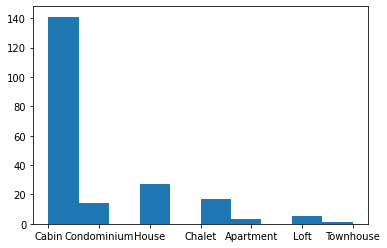

In [17]:
plt.hist(content['property_types']['histogram'])

(array([41., 58., 36., 25., 16., 13.,  9.,  3.,  6.,  1.]),
 array([ 1210. ,  2611.9,  4013.8,  5415.7,  6817.6,  8219.5,  9621.4,
        11023.3, 12425.2, 13827.1, 15229. ]),
 <BarContainer object of 10 artists>)

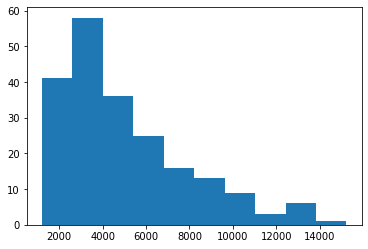

In [20]:
plt.hist(content['rental_income_histogram']['histogram'])

## Realtor API